    *----------------------------------- AUTHOR_DETAILS -------------------------------------*
    |                                                                                                                                    |
    |        Project Title = Developing a Malaria Disease Prediction                   |
    |        System (from Cell Images) using CNN-based Deep Neural Networks |
    |                                                                                                                                    |
    |        Author         = Mr. Sameed Khan and Mr. Talha Naeem                                                |
    |                                                                                                                                    |
    |        Copyright      = Copyright (C) 2020 Mr. Talha Naeem and                    |
    |                                      Mr. Talha Naeem                                                                 |
    |                                                                                                                                   |
    |        License        = Public Domain                                                                         |
    |                                                                                                                                   |
    |        Version        = 1.0                                                                                            |
    |                                                                                                                                   |
    *-------------------------------------------------------------------------------------------------*


# **Project Purpose**
The main purpose of this Project is to demonstrate how CNN-based Deep Neural Network can be used for the development and evaluation of Maleria Cell Prediction System (from Cell Images). For this purpose, In sha Allah, I will treat Maleria Cell Prediction Problem as a Binary Classificaiton Problem i.e. the main goal is to discriminate between two Classses: (1) Parasitized and (2) Uninfected. In sha Allah, in the next Section, I will execute the Machine Learning Cycle.

	Input

> Cell Image
	
	Output

> Label (Parasitized / Uninfected)	



### Mount Google Drive

In [ ]:
''' 
    /*----------------------------- MOUNT_GOOGLE_DRIVE -------------
      - To connect your colab notebook with google drive
''' 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Machine Learning Cycle**
## **Four phases of a Machine Learning Cycle are**
### **Training Phase**
  * **Build the Model using Training Data**

### **Testing Phase**
  * **Evaluate the performance of Model using Testing Data**

### **Application Phase**
  * **Deploy the Model in Real-world , to make prediction on Real-time unseen Data**
  
### **Feedback Phase**
  * **Take Feedback form the Users and Domain Experts to improve the Model**

# Steps – Executing Machine Learning Cycle Using Separate Files
## Step 1: Import Libraries
## Step 2: Load Training Data, Testing Data and Validation Data
### Step 2.1: Load Training Data
### Step 2.2: Load Validation Data
### Step 2.3: Load Testing Data	
## Step 3: Understand and Pre-process Training Data, Validation Data and Testing Data
### Step 3.1: Understand Training Data
### Step 3.2: Understand Validation Data
### Step 3.3: Understand Testing Data
### Step 3.4: Pre-process Training Data
#### Step 3.4.1: GrayScale Cell Images of Training Data
#### Step 3.4.2: Resize Cell Images in Training Data
### Step 3.5: Pre-process Validation Data
#### **Step 3.5.1: GrayScale Cell Images of Validation Data**
#### Step 3.5.2: Resize Cell Images in Validation Data
### **Step 3.6: Pre-process Testing Data**
#### **Step 3.6.1: GrayScale Cell Images of Testing Data**
#### **Step 3.6.2: Resize Cell Images in Testing Data**

## Step 4: Represent Training Data, Validation Data and  Testing Data in Machine Understandable Format
### Step 4.1: Represent Training Data into Machine Understandable Format
#### Step 4.1.1: Convert Resized Grayscale Cell Images in Training Data into Numpy Array
#### Step 4.1.2: Nomalize Numpy Array of Grayscale Cell Images in Training Data

### Step 4.2: Represent Validation Data into Machine Understandable Format
#### Step 4.2.1: Convert Resized Grayscale Cell Images in Validation Data into Numpy Array
#### Step 4.2.2: Nomalize Numpy Array of Grayscale Cell Images in Validation Data
### Step 4.3: Represent Testing Data into Machine Understandable Format
#### Step 4.3.1: Convert Resized Grayscale Cell Images in Testing Data into Numpy Array
#### Step 4.3.2: Nomalize Numpy Array of Grayscale Cell Images in Testing Data

## Step 5: Execute the Training Phase
### Step 5.1: Create CNN Model Architecture
### Step 5.2: Hyperparameters Settings
### Step 5.3: Create CNN Model Object
### Step 5.4: Initialize Optimizer and Loss Function
### Step 5.5: Evaluation Measure
### Step 5.6: Calculate Epoch Elapsed Time
### Step 5.7: Train Model
### Step 5.8: Save Model

## Step 6: Execute the Testing Phase
### Step 6.1: Load Saved Model (Saved in Step 5.8)
### Step 6.2: Make Predictions on Testing Data
### Step 6.3: Evaluate Performance of Trained Model on Test Data
#### Step 6.3.1: Calculate Accuracy
#### Step 6.3.2: Draw Confusion Matrix
#### Step 6.3.3: Print Classification Report

## Step 7: Execute the Application Phase
### Step 7.1: Take Input (X-ray Image) from User 
### Step 7.2: Convert User Input (Cell Image) into Feature Vector (Exactly Same as Feature Vectors of Training Data, Testing Data and Validation Data)
### Step 7.3: Make Prediction on Unseen Data
#### Step 7.3.1: Load the Model (Saved in Step 5.8)
#### Step 7.3.2: Apply Model on Feature Vector of Unseen Data
#### Step 7.3.3: Return Prediction to the User

## Step 8: Execute the Feedback Phase
## Step 9: Improve Model Based on Feedback

In [ ]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 53.82 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


# Step 1: Import Libraries



In [ ]:
''' 
    /*----------------------------- IMPORT_LIBRARIES -------------
'''
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import array_to_img
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import pandas as pd
import itertools
import random
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
print(tf.version.VERSION)
print(tf.keras.__version__)


2.4.0
2.4.0


# Step 2: Load Training Data, Validation Data and Testing Data


In [ ]:
data = []
labels = ['Parasitized', 'Uninfected']
img_width  = 224
img_height = 224
img_dmntn = (img_width,img_height)

def get_Data(data_dir):
    data = [] 
    label =[]
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, img_dmntn) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data), label

In [ ]:
print(os.listdir("../content/Malaria-Classification-Using-CNN/malaria-dataset"))

['Uninfected', 'Parasitized']


### **Step 2.1: Load Training Data**


In [ ]:
training_data, training_label = get_Data('../content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized')

FileNotFoundError: ignored

### **Step 2.2: Load Validation Data**

In [ ]:
validation_data, validation_label = get_Data('../content/drive/MyDrive/Maleria_Sample Data/Validation_Data')

### **Step 2.3: Load Testing Data**


In [ ]:
testing_data, testing_label = get_Data('../content/drive/MyDrive/Maleria_Sample Data/Testing_Data')

# **Step 3: Understand and Pre-process Training Data, Validation Data and Testing Data**


In [ ]:
#Plat an Image
def plot_img(data,data_size):
  fig,aixs=plt.subplots(data_size,2)
  fig.set_size_inches(5,5)
  if len(data) == 0:
        print("no images to show") 
  for i in range(data_size):
      for j in range (2):
          l=random.randint(0,len(data))
          aixs[i,j].imshow(data[l][0])
          aixs[i,j].set_title('Label: '+ labels[data[l][1]])
  plt.tight_layout()

In [ ]:
def cnvt_color(dataset):

  # lists to store data
  data = []

  for imag in np.array(dataset):
    img = array_to_img(imag)
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    data.append(gray)
    
  return np.array(data)

Text(0.5, 1.0, 'Label: Uninfected')

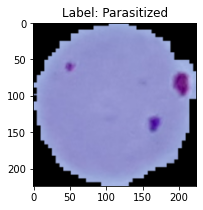

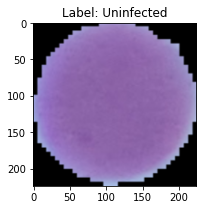

In [ ]:
plt.figure(figsize = (3,3))
plt.imshow(training_data[0][0])
plt.title("Label: "+labels[training_data[0][1]])

plt.figure(figsize = (3,3))
plt.imshow(training_data[-1][0])
plt.title("Label: "+labels[training_data[-1][1]])


## **Step 3.1: Understand Training Data**



In [ ]:
datagen = ImageDataGenerator( )
print("Training Data:") 
train_data = datagen.flow_from_directory("../content/drive/MyDrive/Maleria_Sample Data/Training_Data",
                                                     class_mode = 'binary'
                                                     )
print("Training Data Shape ",training_data.shape)

Training Data:
Found 72 images belonging to 2 classes.
Training Data Shape  (72, 2)


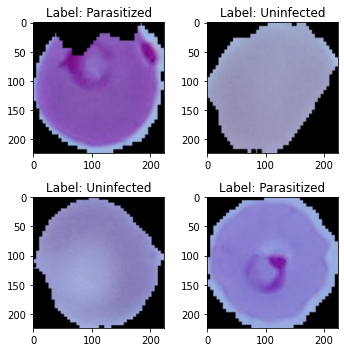

In [ ]:
plot_img(data=training_data, data_size=2)

## **Step 3.2: Understand Validation Data**


In [ ]:
print("Validation Data:")
valid_data = datagen.flow_from_directory("../content/drive/MyDrive/Maleria_Sample Data/Validation_Data",
                                                     class_mode = 'binary'
                                                     )
print("Validation Data Shape ",validation_data.shape)

Validation Data:
Found 8 images belonging to 2 classes.
Validation Data Shape  (8, 2)


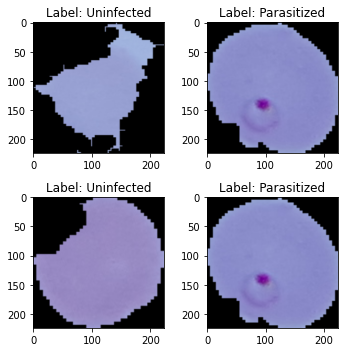

In [ ]:
plot_img(data=validation_data, data_size=2)

## **Step 3.3: Understand Testing Data**


In [ ]:
print("Testing Data:")
test_data = datagen.flow_from_directory("../content/drive/MyDrive/Maleria_Sample Data/Testing_Data",
                                                     class_mode = 'binary'
                                                     )
print("Testing Data Shape",testing_data.shape)

Testing Data:
Found 20 images belonging to 2 classes.
Testing Data Shape (20, 2)


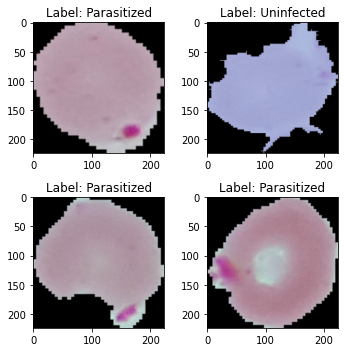

In [ ]:
plot_img(data=testing_data, data_size=2)

## **Step 3.4: Pre-process Training Data**


In [ ]:
input_training_data = []
output_training_label = []

for feature, label in np.array(training_data):
    input_training_data.append(feature)
    output_training_label.append(label)

print(np.array(input_training_data).shape)


(72, 224, 224, 3)


### **Step 3.4.1: GrayScale Cell Images of Training Data**


In [ ]:
grayscale_training_data  = cnvt_color(input_training_data)
print((grayscale_training_data).shape)


(72, 224, 224)


### **Step 3.4.2: Resize Cell Images in Training Data**



In [ ]:
resized_training_data = grayscale_training_data.reshape(-1, img_width,img_height,1)
normalized_training_label = np.array(output_training_label)
print(np.array(resized_training_data).shape)

(72, 224, 224, 1)


## **Step 3.5: Pre-process Validation Data**


In [ ]:
input_validation_data = []
output_validation_label = []

for feature, label in validation_data:
    input_validation_data.append(feature)
    output_validation_label.append(label)

print(np.array(input_validation_data).shape)


(8, 224, 224, 3)


### **Step 3.5.1: GrayScale Cell Images of Validation Data**


In [ ]:
grayscale_validation_data = cnvt_color(input_validation_data)
print(np.array(grayscale_validation_data).shape)

(8, 224, 224)


### **Step 3.5.2: Resize Cell Images in Validation Data**

In [ ]:
resized_validation_data = grayscale_validation_data.reshape(-1, img_width,img_height,1)
normalized_validation_label = np.array(output_validation_label)
print(np.array(resized_validation_data).shape)

(8, 224, 224, 1)


## **Step 3.6: Pre-process Testing Data**


In [ ]:
input_testing_data = []
output_testing_label = []

for feature, label in testing_data:
    input_testing_data.append(feature)
    output_testing_label.append(label)
    
print(np.array(input_testing_data).shape)


(20, 224, 224, 3)


### **Step 3.6.1: GrayScale Cell Images of Testing Data**


In [ ]:
grayscale_testing_data    = cnvt_color(input_testing_data)
print(np.array(grayscale_testing_data).shape)

(20, 224, 224)


### **Step 3.6.2: Resize Cell Images in Testing Data**


In [ ]:
resized_testing_data = grayscale_testing_data.reshape(-1, img_width,img_height,1)
normalized_testing_label = np.array(output_testing_label)
print(np.array(resized_testing_data).shape)

(20, 224, 224, 1)


# **Step 4: Represent Training Data, Validation Data and Testing Data in Machine Understandable Format**

## **Step 4.1: Represent Training Data into Machine Understandable Format**


### **Step 4.1.1: Convert Resized Grayscale Cell Images in Training Data into Numpy Array**


In [ ]:
resized_training_data = np.array(resized_training_data)
print(resized_training_data.shape)

(72, 224, 224, 1)


### **Step 4.1.2: Nomalize Numpy Array of Grayscale Cell Images in Training Data**


In [ ]:
normalized_training_data =resized_training_data/255
preprocessed_training_data = normalized_training_data.reshape(-1,img_width,img_height,1)
print(preprocessed_training_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

## **Step 4.2: Represent Validation Data into Machine Understandable Format**


### **Step 4.2.1: Convert Resized Grayscale Cell Images in Validation Data into Numpy Array**


In [ ]:
resized_validation_data = np.array(resized_validation_data)
print(resized_validation_data.shape)

(8, 224, 224, 1)


### **Step 4.2.2: Nomalize Numpy Array of Grayscale Cell Images in Validation Data**


In [ ]:
normalized_validation_data =resized_validation_data/255
preprocessed_validation_data = normalized_validation_data.reshape(-1,img_width,img_height,1)
print(preprocessed_validation_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

## **Step 4.3: Represent Testing Data into Machine Understandable Format**


### **Step 4.3.1: Convert Resized Grayscale Cell Images in Testing Data into Numpy Array**


In [ ]:
resized_testing_data = np.array(resized_testing_data)
print(resized_testing_data.shape)

(20, 224, 224, 1)


### **Step 4.3.2: Nomalize Numpy Array of Grayscale Cell Images in Testing Data**

In [ ]:
normalized_testing_data =resized_testing_data/255
preprocessed_testing_data = normalized_testing_data.reshape(-1,img_width,img_height,1)
print(preprocessed_testing_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

# **Step 5: Execute the Training Phase**

## **Step 5.1: Create CNN Model Architecture**

In [ ]:
model = Sequential()
#Conv Layer 01
model.add(Conv2D(32 , (3,3) , strides = (1,1) , padding = 'same' , activation = 'relu' , input_shape = (img_width,img_height,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = (2,2) , padding = 'same'))

#Conv Layer 02
model.add(Conv2D(64 , (3,3) , strides = (1,1) , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = (2,2) , padding = 'same'))

#Conv Layer 03
model.add(Conv2D(64 , (3,3) , strides = (1,1) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = (2,2), padding = 'same'))

#Conv Layer 04
model.add(Conv2D(128 , (3,3) , strides = (1,1) , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = (2,2) , padding = 'same'))

#Conv Layer 05
model.add(Conv2D(256 , (3,3) , strides = (1,1), padding = 'same' , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = (2,2) , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 1000 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units = 500 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 250 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 2 , activation = 'relu'))


In [ ]:
normalized_validation_label.shape[0]

8

## **Step 5.2: Hyper Parameter**

## **Step 5.3: Initialize Optimizer And Loss Function**
 

In [ ]:
model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

## **Step 5.4: Train Model**

In [ ]:
from keras.utils import to_categorical
#normalized_training_label = to_categorical(normalized_training_label).astype(int)
#normalized_validation_label = to_categorical(normalized_validation_label).astype(int)

In [ ]:
tf.config.run_functions_eagerly(True)


In [ ]:
history = model.fit(preprocessed_training_data, 
                    normalized_training_label, 
                    batch_size = 10,
                    epochs = 12 , 
                    validation_data = (preprocessed_validation_data,  normalized_validation_label))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/12
8/8 [==============================] - 0s 61ms/step - loss: 6.4849 - accuracy: 0.5417 - val_loss: 4.4957 - val_accuracy: 0.5000
Epoch 2/12
8/8 [==============================] - 0s 39ms/step - loss: 8.5626 - accuracy: 0.3889 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/12
8/8 [==============================] - 0s 38ms/step - loss: 7.3857 - accuracy: 0.5417 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/12
8/8 [==============================] - 0s 39ms/step - loss: 7.7986 - accuracy: 0.4861 - val_loss: 4.2330 - val_accuracy: 0.5000
Epoch 5/12
8/8 [==============================] - 0s 39ms/step - loss: 7.5850 - accuracy: 0.5139 - val_loss: 6.8872 - val_accuracy: 0.5000
Epoch 6/12
8/8 [==============================] - 0s 40ms/step - loss: 7.3707 - accuracy: 0.5417 - val_loss: 7.6895 - val_accuracy: 0.5000
Epoch 7/12
8/8 [==============================] - 0s 40ms/step - loss: 7.7973 - accuracy: 0.4861 - val_loss: 7.6895 - val_accuracy: 0.5000
Epoch 8/12
8/8 [===========

##**Step 5.5: Calculate Number of Epoch used in your Matrix**
 Epochs = 12

##**Step 5.6: Save Model**

In [ ]:
#To save this model 
model.save('my_model.h5')

# **Step 6: Execute the Testing Phase**

## **Step 6.1:Load Saved Model**




In [ ]:
from keras.models import load_model

model = load_model('/content/my_model.h5')

##**Step 6.2:  Making Prediction**





In [ ]:
prediction = model.predict(preprocessed_testing_data)
print(prediction)

[[0.        4.8814726]
 [0.        5.0103474]
 [0.        5.0272155]
 [0.        4.486764 ]
 [0.        4.9888344]
 [0.        4.29341  ]
 [0.        4.578637 ]
 [0.        4.5445046]
 [0.        4.4847746]
 [0.        4.234986 ]
 [0.        4.6853323]
 [0.        4.499746 ]
 [0.        4.68492  ]
 [0.        5.1124125]
 [0.        5.0795865]
 [0.        4.6113544]
 [0.        5.105543 ]
 [0.        4.5953197]
 [0.        5.0584044]
 [0.        4.4741597]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


## **Step: 6.3: Evaluate Performance** 

### **Step: 6.3.1: Calculate Accuracy**

In [ ]:
# Showing loss and Accuracy of Model\n",
print("Loss of the model is - " , model.evaluate(preprocessed_testing_data,normalized_testing_label)[0])
print("Accuracy of the model is - " , model.evaluate(preprocessed_testing_data,normalized_testing_label)[1]*100 , "%")

1/1 [==============================] - 0s 2ms/step - loss: 7.6895 - accuracy: 0.0000e+00
Loss of the model is -  7.689547061920166
1/1 [==============================] - 0s 1ms/step - loss: 7.6895 - accuracy: 0.0000e+00
Accuracy of the model is -  0.0 %


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


###	**Step 6.3.2: Draw Confusion Matrix**

In [ ]:
"""
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

def confusion_matrix(cm,
                          labels,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if labels is not None:
        tick_marks = np.arange(len(labels))
        plt.xticks(tick_marks, labels, rotation=45)
        plt.yticks(tick_marks, labels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
confusion_matrix(normalized_testing_label, prediction, labels==['Parasitized','Uninfected'])

ValueError: ignored

In [ ]:
def plot_confusion_matrix(y_true, y_pred, label,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Refer to: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred,label)
    # Only use the labels that appear in the data
    label = label[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(label))
    plt.xticks(tick_marks, fontsize=25)
    plt.yticks(tick_marks, fontsize=25)
    plt.xlabel('Predicted label',fontsize=25)
    plt.ylabel('True label', fontsize=25)
    plt.title(title, fontsize=30)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="5%", pad=0.15)
    cbar = ax.figure.colorbar(im, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
#            title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    fontsize=20,
                    horizontalalignment="center", 
                    verticalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plot_confusion_matrix(normalized_testing_label, prediction, 
                      label=['Parasitized','Uninfected'],
                      normalize=True,
                      title='Confusion matrix')

ValueError: ignored

In [ ]:
def confusion_matrix(yt, yp, labels):
    
    instcount = yt.shape[0]
    n_classes = len(labels)
    fp = ((yt - yp) < 0).sum(axis = 0)
    fn = ((yt - yp) > 0).sum(axis = 0)
    tp = (yt*yp).sum(axis = 0)
    tn = ((yt==0)*(yp==0)).sum(axis = 0)
    mtx = np.vstack([tp/(tp + fn), fn/(tp + fn), tn/(tn + fp), fp/(tn + fp)]).T
    plt.figure(num=None, figsize=(5, 15), dpi=100, facecolor='w', edgecolor='k')
    plt.imshow(mtx, interpolation='nearest',cmap='Blues')
    plt.title("Confusion matrix")
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    for i, j in itertools.product(range(n_classes), range(4)):
        plt.text(j, i, round(mtx[i][j],2), horizontalalignment="center")

    plt.ylabel('True labels')
    plt.xlabel('True Predicted')
    plt.show()

In [ ]:
confusion_matrix(normalized_testing_label, prediction, labels=['Parasitized','Uninfected'])


ValueError: ignored

###	**Step 6.3.3: Print Classification Report**

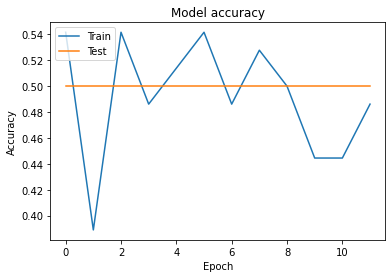

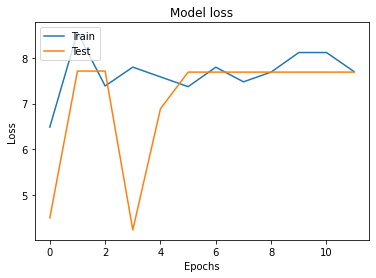

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Step 7: Execute the Application Phase**

## **Step 7.1: Take Input (Cell Image) from User** 

In [ ]:
# importing image from user
path = '../content/drive/MyDrive/Maleria_Sample Data/Training_Data/Parasitized/Parasitze_IMG- (1).png'
getImg =cv2.imread(path)


## **Step 7.2: Convert User Input (Cell Image) into Feature Vector(Exactly Same as Feature Vectors of Training Data,Validation Data and Testing Data)** 

In [ ]:
resize_user_image = cv2.resize(getImg, img_dmntn)
grayscale_user_image = cv2.cvtColor(np.float32(resize_user_image), cv2.COLOR_BGR2GRAY)
normalized_user_image = grayscale_user_image / 255

preprocessed_user_image = normalized_user_image.reshape(-1,img_width,img_height,1)

## **Step 7.3: Make Prediction on Unseen Data** 

### **Step 7.3.1. Load Saved Model**

In [ ]:
# Loading our Saved model
LoadModel = load_model('/content/my_model.h5') 


### **Step 7.3.2: Apply Model on Feature Vector of Unseen Data**

In [ ]:
prediction = model.predict(preprocessed_user_image)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


### **Step 7.3.3. Retrun Prediction to User**

In [ ]:
if prediction < 0.7 :
  print("""
  *====================*
  |     Parasitized    |
  *====================*
  """)
else:
    print("""
  *====================*
  |     Uninfected     |
  *====================*
  """)

ValueError: ignored

# **Step 8: Execute the Feedback Phase**


A Two Step Process
*   Step 1: After sometime , take Feedback from 
  * Domain Experts and Users on deployed Gender Prediction System
*   Step 2: Make a List of Possible Improvements based on Feedback received


# **Step 9: Improve Model based on Feedback**



* There is Always Room for Improvement 😊
* Based on Feedback form Domain Experts and Users
  * Improve your Model 